In [1]:
import pandas as pd
import pydicom
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import os
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the CSV file
df = pd.read_csv('RSNA_breast_cancer_data.csv')

In [2]:
# Function to load DICOM images and resize them
def load_dicom_image(image_path, target_size=(300, 300)):  # Resize to 300x300 for ResNet101
    dicom = pydicom.dcmread(image_path)
    image = dicom.pixel_array
    image_resized = cv2.resize(image, target_size)
    image_normalized = image_resized / np.max(image_resized)  # Normalize pixel values
    
    # Convert grayscale to 3 channels by replicating the grayscale image
    image_rgb = np.stack([image_normalized] * 3, axis=-1)  # Replicate across 3 channels
    return image_rgb

# Load all the images and labels
image_paths = df['image_path'].values
labels = df['cancer'].values

- No, it doesn't introduce noise because you're not adding any new information; you're simply replicating the existing pixel values across three channels.
- This doesn't alter the image's content; it just allows the image to fit the model's expected input format. The model will treat all three channels as having the same value, which is fine as long as the model was trained on RGB images.

In [53]:
path = df['image_path'].iloc[0]
print(f"type: {type(path)}, value: {path}")

type: <class 'str'>, value: IMG\669597068.dcm


In [54]:
dicom = pydicom.dcmread(path)
image = dicom.pixel_array
image

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [3592, 3566, 3444, ...,    0,    0,    0],
       [3428, 3441, 3278, ...,    0,    0,    0],
       [3413, 3471, 3388, ...,    0,    0,    0]],
      shape=(3328, 2560), dtype=uint16)

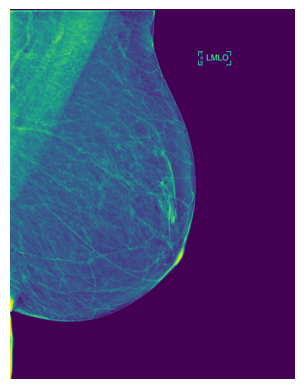

In [47]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [55]:
target_size=(300, 300)
image_resized = cv2.resize(image, target_size)
image_resized

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [3386, 2923, 2131, ...,    0,    0,    0],
       [3389, 3021, 2345, ...,    0,    0,    0],
       [3292, 2855, 2629, ...,    0,    0,    0]],
      shape=(300, 300), dtype=uint16)

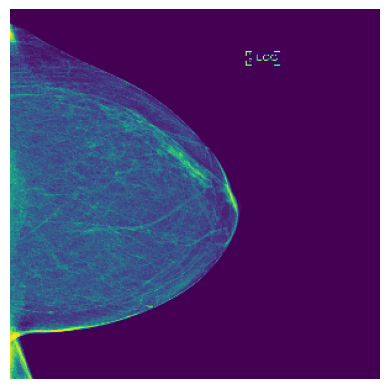

In [ ]:
# Display the image
plt.imshow(image_resized)
plt.axis('off')  # Hide axes
plt.show()

12-bit images have pixel values ranging from 0 to 4095

In [57]:
np.max(image_resized) # see if it is 255 or sth

np.uint16(4095)

In [49]:
image_normalized = image_resized / np.max(image_resized)
image_normalized

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [15.45098039, 15.19607843, 14.64313725, ...,  0.        ,
         0.        ,  0.        ],
       [12.53333333, 12.21568627, 12.09803922, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [15.54509804,  8.58431373,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [15.34117647,  3.59607843,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [14.78039216,  0.3254902 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(300, 300))

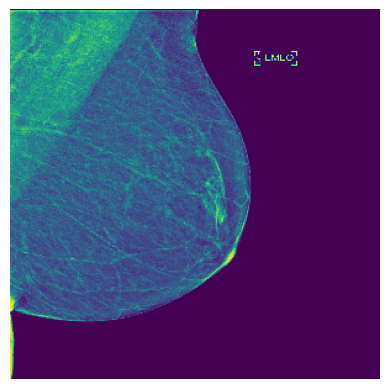

In [52]:
# Display the image
plt.imshow(image_normalized)
plt.axis('off')  # Hide axes
plt.show()

In [39]:
image_rgb = np.stack([image_normalized] * 3, axis=-1)
image_rgb

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.96214896, 0.96214896, 0.96214896],
        [0.94627595, 0.94627595, 0.94627595],
        [0.91184371, 0.91184371, 0.91184371],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.78046398, 0.78046398, 0.78046398],
        [0.76068376, 0.76068376, 0.76068376],
        [0.75335775, 0.75335775, 0.75335775],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.96800977, 0.96800977, 0.96800977],
        [0.53455433, 0.53455433, 0.53455433],
        [0.        , 0

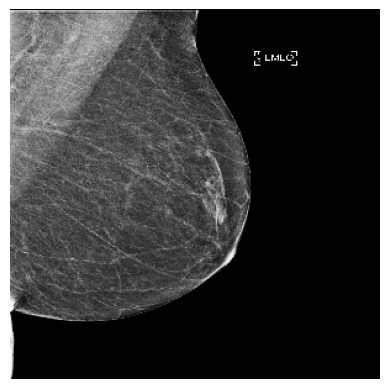

In [43]:
# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [59]:
import pydicom
import cv2
import numpy as np

# Loop through all image paths in the dataframe
for i, path in enumerate(df['image_path']):
    # Read the DICOM file
    dicom = pydicom.dcmread(path)

    # Extract the pixel array from the DICOM file
    image = dicom.pixel_array

    # Resize the image to the target size
    target_size = (300, 300)
    image_resized = cv2.resize(image, target_size)

    # Get the maximum pixel value of the resized image
    max_pixel_value = np.max(image_resized)

    # Print the max pixel value for each image and check if it exceeds 4095
    if max_pixel_value > 4095:
        print(f"Image at index {i} ({path}) has max pixel value: {max_pixel_value}")

Image at index 1656 (IMG\831862963.dcm) has max pixel value: 4260
Image at index 1672 (IMG\100791157.dcm) has max pixel value: 4132
Image at index 2010 (IMG\735202245.dcm) has max pixel value: 4228
Image at index 2180 (IMG\1168039233.dcm) has max pixel value: 4228


In [60]:
import pydicom
import cv2
import numpy as np

# Initialize a set to store unique max pixel values
unique_max_values = set()

# Loop through all image paths in the dataframe
for i, path in enumerate(df['image_path']):
    # Read the DICOM file
    dicom = pydicom.dcmread(path)

    # Extract the pixel array from the DICOM file
    image = dicom.pixel_array

    # Resize the image to the target size
    target_size = (300, 300)
    image_resized = cv2.resize(image, target_size)

    # Get the maximum pixel value of the resized image
    max_pixel_value = np.max(image_resized)

    # Add the max pixel value to the set (avoiding duplicates)
    unique_max_values.add(max_pixel_value)

# Convert the set to a sorted list for better readability (optional)
sorted_max_values = sorted(list(unique_max_values))

# Print the unique max pixel values
print(f"Unique max pixel values: {sorted_max_values}")

Unique max pixel values: [np.uint16(13), np.uint16(1023), np.uint16(1573), np.uint16(2054), np.uint16(2079), np.uint16(2102), np.uint16(2113), np.uint16(2138), np.uint16(2141), np.uint16(2157), np.uint16(2165), np.uint16(2177), np.uint16(2179), np.uint16(2189), np.uint16(2203), np.uint16(2227), np.uint16(2238), np.uint16(2286), np.uint16(2291), np.uint16(2561), np.uint16(2576), np.uint16(2602), np.uint16(2624), np.uint16(2634), np.uint16(2657), np.uint16(2681), np.uint16(2703), np.uint16(2716), np.uint16(2721), np.uint16(2726), np.uint16(2727), np.uint16(2741), np.uint16(2749), np.uint16(2769), np.uint16(2778), np.uint16(2796), np.uint16(2816), np.uint16(2824), np.uint16(2836), np.uint16(2847), np.uint16(2852), np.uint16(2855), np.uint16(2865), np.uint16(2871), np.uint16(2880), np.uint16(2884), np.uint16(2892), np.uint16(2895), np.uint16(2904), np.uint16(2905), np.uint16(2909), np.uint16(2912), np.uint16(2914), np.uint16(2916), np.uint16(2921), np.uint16(2923), np.uint16(2940), np.uint

In [64]:
len(sorted_max_values)

337

Flexibility: It's generally better to normalize using np.max(image_resized) for each image to ensure each image is normalized independently, preserving their original pixel value distribution.

===========================

In [3]:
# Prepare data
images = []
for path in image_paths:
    image = load_dicom_image(path)  # Directly use the full path from the CSV
    images.append(image)

images = np.array(images)
labels = np.array(labels)

In [65]:
images.shape

(2374, 300, 300, 3)

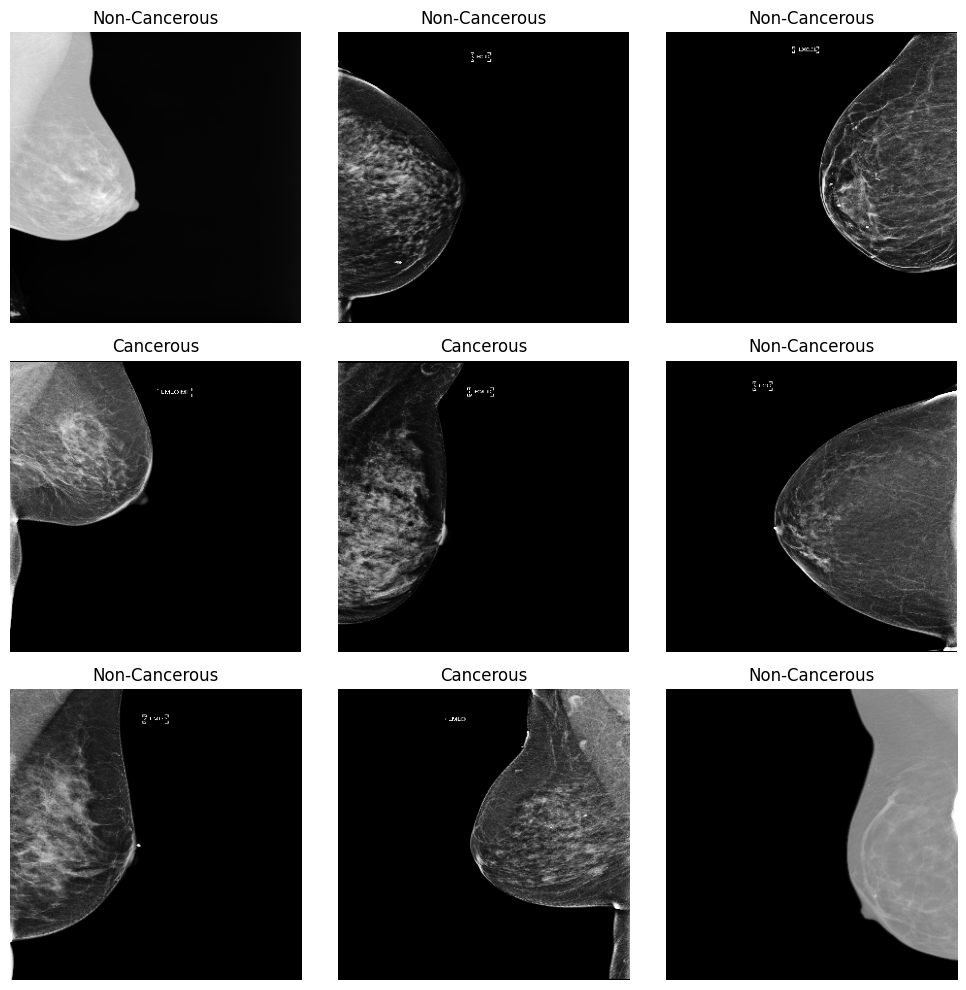

In [67]:
# Visualize 9 random images in a 3x3 grid from the 'images' array
import random
# Select 9 random indices to visualize
random_indices = random.sample(range(len(images)), 9)

# Create a figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop through the 9 random images
for i, ax in enumerate(axes.flat):
    # Get the corresponding image and label
    image_to_visualize = images[random_indices[i]]
    label = labels[random_indices[i]]
    
    # Plot the image
    ax.imshow(image_to_visualize.squeeze(), cmap='gray')  # Remove the channel dimension
    ax.set_title(f'{"Cancerous" if label == 1 else "Non-Cancerous"}')  # Display the label
    
    # Turn off axis for a cleaner look
    ax.axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [24]:
# Load ResNet101 for feature extraction, without the final classification layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze the base model's layers
base_model.trainable = False

""" try using this as well
# Unfreeze the top layers of ResNet101
base_model.trainable = True
"""

# Create a new model for feature extraction
feature_extractor = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Pool the extracted features
    Flatten()  # Flatten the features to a 1D vector
])

# Extract features from the entire dataset
features = feature_extractor.predict(images)

75/75 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step


In [25]:
features

array([[7.9171491e-01, 2.4123241e-01, 2.3114828e-02, ..., 1.1121035e-04,
        1.5627064e-01, 0.0000000e+00],
       [7.5232673e-01, 2.3685810e-01, 2.7073815e-02, ..., 4.8604966e-04,
        1.3769023e-01, 0.0000000e+00],
       [8.0427903e-01, 2.5942403e-01, 1.5805287e-02, ..., 2.9615284e-04,
        1.2478270e-01, 0.0000000e+00],
       ...,
       [8.0837840e-01, 2.3902389e-01, 1.2174531e-02, ..., 2.2417712e-03,
        1.2141514e-01, 0.0000000e+00],
       [7.9524839e-01, 2.3740225e-01, 2.6202366e-02, ..., 1.5335238e-03,
        1.1035688e-01, 0.0000000e+00],
       [8.0002958e-01, 2.3515183e-01, 2.7204879e-02, ..., 1.3979161e-03,
        1.2980707e-01, 0.0000000e+00]], shape=(2374, 2048), dtype=float32)

In [101]:
# Now split the extracted features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Using SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernel_options = ['linear', 'rbf', 'poly', 'sigmoid']
degree_range = np.arange(1, 6)
coef0_range = np.logspace(-1, 1, 3)

param_grid = {
    'C': C_range,
    'gamma': gamma_range,
    'kernel': kernel_options,
    'degree': degree_range,         # Only relevant for 'poly' kernel
    'coef0': coef0_range         # Relevant for 'poly' and 'sigmoid' kernels
}

cv = StratifiedShuffleSplit(n_splits=5, 
                            test_size=0.2, 
                            random_state=42)
grid = GridSearchCV(SVC(), 
                    param_grid=param_grid, 
                    cv=cv)

grid.fit(X_train, y_train)

In [ ]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',C= 1.0, gamma= 1.0)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

In [36]:
print(f"y test {y_test.shape}, y pred {y_test_pred.shape}")

y test (475,), y pred (475,)


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       247
           1       0.67      0.68      0.68       228

    accuracy                           0.69       475
   macro avg       0.69      0.69      0.69       475
weighted avg       0.69      0.69      0.69       475



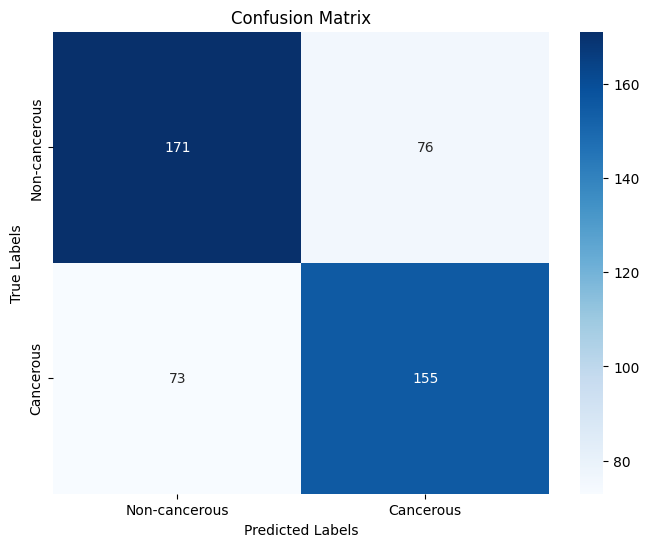

In [38]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-cancerous', 'Cancerous'], yticklabels=['Non-cancerous', 'Cancerous'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
# -- ROC CURVE --
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred are the ground truth and predicted labels

# Binarize the labels for ROC curve (if they are not already in binary form)
# Ensure y_test is binary (0,1) before proceeding
y_test_binarized = label_binarize(y_test, classes=[0, 1])

# Get the decision function or probabilities from the classifier (for SVM)
y_test_pred_proba = classifier.decision_function(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binarized, y_test_pred_proba)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Using RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

no_of_trees = np.arange(100, 600, 100)
max_depth_tree = [None, 10, 20, 30, 40, 50]
no_of_node_split = np.arange(2, 11, 3)
no_of_leaf_samples = np.arange(1, 5)
no_of_features = ['auto', 'sqrt', 'log2']

# Define the parameter grid
param_grid = {
    'n_estimators': no_of_trees,  # Number of trees in the forest
    'max_depth': max_depth_tree,    # Maximum depth of the tree
    'min_samples_split': no_of_node_split,            # Minimum number of samples to split a node
    'min_samples_leaf': no_of_leaf_samples,              # Minimum number of samples required in a leaf node
    'bootstrap': [True, False],                 # Whether to bootstrap samples or not
    'max_features': no_of_features,   # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']            # Function to measure the quality of a split
}

# Create StratifiedShuffleSplit for cross-validation
cv = StratifiedShuffleSplit(n_splits=5, 
                            test_size=0.2, 
                            random_state=42)

# Initialize the GridSearchCV with RandomForestClassifier and parameter grid
grid = GridSearchCV(RandomForestClassifier(), 
                    param_grid=param_grid, 
                    cv=cv)

# Fit the model to find the best parameters
grid.fit(X_train, y_train)

In [41]:
## lighter training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
import numpy as np

# Focusing on the most important parameters
no_of_trees = np.arange(100, 300, 100)  # Reducing the range of n_estimators
max_depth_tree = [10, 20, 30]           # Limiting the range of max_depth
no_of_features = ['auto', 'sqrt']       # Focusing on the most common options for max_features

# Define the reduced parameter grid
param_grid = {
    'n_estimators': no_of_trees,         # Number of trees in the forest
    'max_depth': max_depth_tree,         # Maximum depth of the tree
    'max_features': no_of_features,      # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']     # Function to measure the quality of a split
}

# Create StratifiedShuffleSplit for cross-validation
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Initialize the GridSearchCV with RandomForestClassifier and reduced parameter grid
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)

# Fit the model to find the best parameters
grid.fit(X_train, y_train)

c:\Users\abhil.LAPTOP-UDIMD39P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abhil.LAPTOP-UDIMD39P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\abhil.LAPTOP-UDIMD39P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\abhil.LAPTOP-UDIMD39P\AppData\

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([100, 200])})

In [42]:
# Output the best parameters and score
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': np.int64(200)} with a score of 0.66


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with specific hyperparameters
classifier = RandomForestClassifier(
    n_estimators=np.int64(200),    # Number of trees in the forest
    max_depth=30,       # Whether to use bootstrap samples
    max_features='sqrt', # Number of features to consider at each split (square root of total)
    criterion='entropy'     # Criterion for splitting (gini impurity)
)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_test_pred = classifier.predict(X_test)

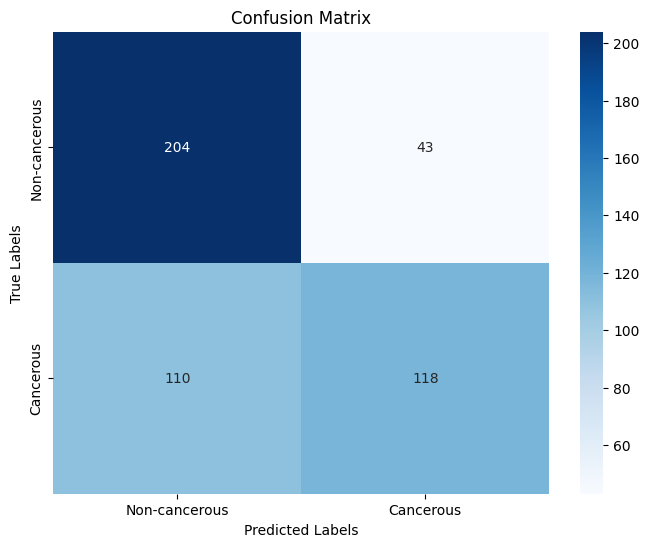

In [44]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-cancerous', 'Cancerous'], yticklabels=['Non-cancerous', 'Cancerous'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

## With Base model trainable

In [68]:
# Load ResNet101 for feature extraction, without the final classification layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Unfreeze the top layers of ResNet101
base_model.trainable = True

# Create a new model for feature extraction
feature_extractor = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Pool the extracted features
    Flatten()  # Flatten the features to a 1D vector
])

# Extract features from the entire dataset
features = feature_extractor.predict(images)

75/75 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step


In [69]:
# Now split the extracted features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Using SVM

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': np.float64(1.0), 'gamma': np.float64(1.0)} with a score of 0.67


In [73]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',C= 1.0, gamma= 1.0)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       247
           1       0.67      0.68      0.68       228

    accuracy                           0.69       475
   macro avg       0.69      0.69      0.69       475
weighted avg       0.69      0.69      0.69       475



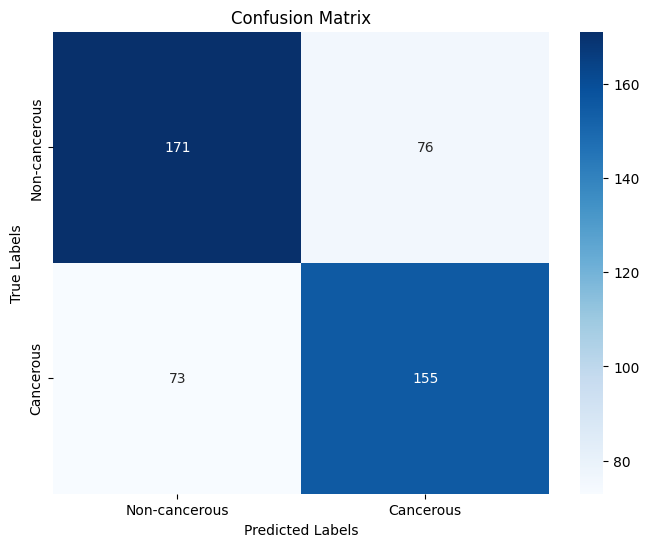

In [75]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-cancerous', 'Cancerous'], yticklabels=['Non-cancerous', 'Cancerous'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernel_options = ['linear', 'rbf', 'poly', 'sigmoid']
degree_range = np.arange(1, 6)
coef0_range = np.logspace(-1, 1, 3)

param_grid = {
    'C': C_range,
    'gamma': gamma_range,
    'kernel': kernel_options,
    'degree': degree_range,         # Only relevant for 'poly' kernel
    'coef0': coef0_range         # Relevant for 'poly' and 'sigmoid' kernels
}

cv = StratifiedShuffleSplit(n_splits=5, 
                            test_size=0.2, 
                            random_state=42)
grid = GridSearchCV(SVC(), 
                    param_grid=param_grid, 
                    cv=cv)

grid.fit(X_train, y_train)

In [ ]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

# Using RF

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with default parameters
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other params

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = classifier.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       247
           1       0.74      0.52      0.61       228

    accuracy                           0.68       475
   macro avg       0.70      0.68      0.67       475
weighted avg       0.69      0.68      0.67       475



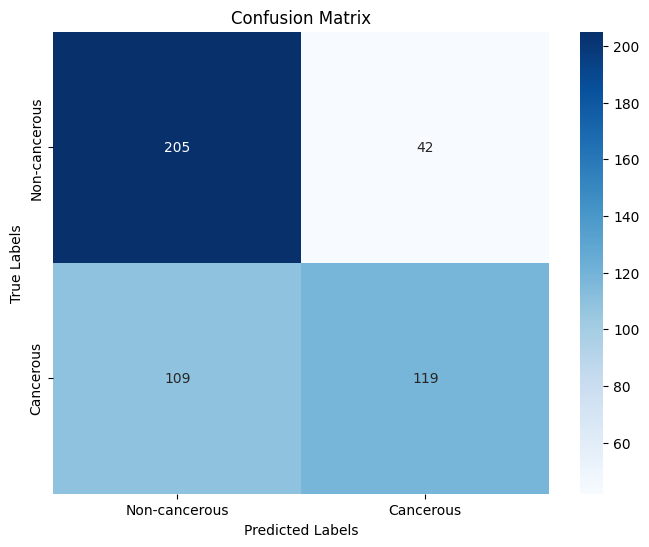

In [81]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-cancerous', 'Cancerous'], yticklabels=['Non-cancerous', 'Cancerous'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

NEED to use GRIDSESARCHCV for RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

no_of_trees = np.arange(100, 600, 100)
max_depth_tree = [None, 10, 20, 30, 40, 50]
no_of_node_split = np.arange(2, 11, 3)
no_of_leaf_samples = np.arange(1, 5)
no_of_features = ['auto', 'sqrt', 'log2']

# Define the parameter grid
param_grid = {
    'n_estimators': no_of_trees,  # Number of trees in the forest
    'max_depth': max_depth_tree,    # Maximum depth of the tree
    'min_samples_split': no_of_node_split,            # Minimum number of samples to split a node
    'min_samples_leaf': no_of_leaf_samples,              # Minimum number of samples required in a leaf node
    'bootstrap': [True, False],                 # Whether to bootstrap samples or not
    'max_features': no_of_features,   # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']            # Function to measure the quality of a split
}

# Create StratifiedShuffleSplit for cross-validation
cv = StratifiedShuffleSplit(n_splits=5, 
                            test_size=0.2, 
                            random_state=42)

# Initialize the GridSearchCV with RandomForestClassifier and parameter grid
grid = GridSearchCV(RandomForestClassifier(), 
                    param_grid=param_grid, 
                    cv=cv)

# Fit the model to find the best parameters
grid.fit(X_train, y_train)

In [ ]:
# Output the best parameters and score
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

## INTRODUCE LDA

In [102]:
# Apply LDA (or other transformation) only on the training data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)  # Fit and transform the training data

# Transform the test data using the same LDA transformation (no fitting here)
X_test_lda = lda.transform(X_test)  # Only transform the test data

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, gamma=1.0)
svm_classifier.fit(X_train_lda, y_train)

SVC(gamma=1.0, kernel='linear')

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_test_pred = svm_classifier.predict(X_test_lda)

# Evaluate the model on the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       247
           1       0.58      0.60      0.59       228

    accuracy                           0.60       475
   macro avg       0.60      0.60      0.60       475
weighted avg       0.60      0.60      0.60       475



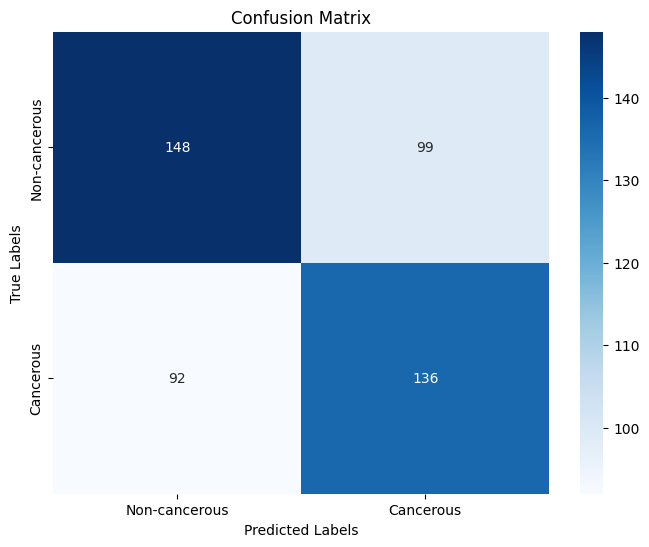

In [104]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-cancerous', 'Cancerous'], yticklabels=['Non-cancerous', 'Cancerous'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')  
plt.show()

In [91]:
import joblib

# Save the trained model to a file
joblib.dump(svm_classifier, 'Models/300_resnet_svm_model.pkl')  # You can choose your desired filename

['Models/300_resnet_svm_model.pkl']

In [ ]:
# Load the saved model from the file
svm_classifier_loaded = joblib.load('Models/300_resnet_svm_model.pkl')

# Now you can use the loaded model to make predictions, etc.
y_test_pred = svm_classifier_loaded.predict(X_test)